# Dataset Proyecto final

Datos reales anoninimizados de los historicos de consumo de energía de una empresa del sector Oil and Gas en colombia.

El objetivo del proyecto es predecir el consumo diario de energía eléctrica, esto es un input importante para el despacho eficiente de energía en este tipo de compañías, un dato adecuado del consumo futuro permite alinear los sistemas de generación más costo eficientes que logren atender esta demanda

In [ ]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

### Leyendo el archivo

In [148]:
import pandas as pd
archivo = r'C:\Users\cjcam\Desktop\Msc_Matematicas\ST\ST_0924\docs\energiaVLL.csv'
df = pd.read_csv(archivo, encoding='latin1', sep=';', decimal=',')
df.head()

,Fecha,Energia_kWhd
0,1/01/2021,112518.8571
1,2/01/2021,114637.7143
2,3/01/2021,114720.0000
3,4/01/2021,116262.8571
4,5/01/2021,115220.5714


In [149]:
# Eliminar la columna de índice 1 del DataFrame df
df = df.drop(df.columns[0], axis=1)

# Combinar los DataFrames df_dates y df
df_combined = pd.concat([df_dates, df], axis=1)

df_combined.head()

,Date,Energia_kWhd
0,2021-01-01,112518.8571
1,2021-01-02,114637.7143
2,2021-01-03,114720.0000
3,2021-01-04,116262.8571
4,2021-01-05,115220.5714


### Analisis grafico

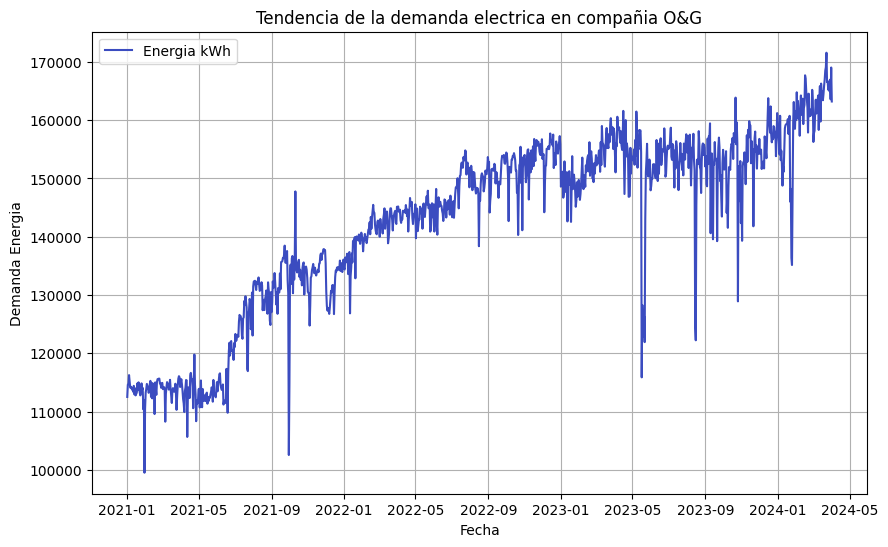

In [37]:


# Establecer la columna 'Fecha' como el índice del DataFrame
df_combined.set_index('Date', inplace=True)

# Crear la gráfica de la serie de tiempo
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(df_combined.index, df_combined['Energia_kWhd'], label='Energia kWh')

# Etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Demanda Energia')
plt.title('Tendencia de la demanda electrica en compañia O&G')

# Mostrar la leyenda y la gráfica
plt.legend()
plt.grid(True)
plt.show()


In [25]:
frecuencia = pd.infer_freq(df_combined.index)
print("Frecuencia: ", frecuencia)


Frecuencia:  D


Se puede observar una tendencia de crecimiento general en la serie de tiempo (que tiene una frecuencia diaria), esto podría atribuirse a la mayor producción de crudo y agua , es importante resaltar que si realiza un "zoom" en un mes particular se pueden ver variaciones en el consumo de energía que podrían ocultar la tendencia general si no se mira con suficiente data hacia el pasadp

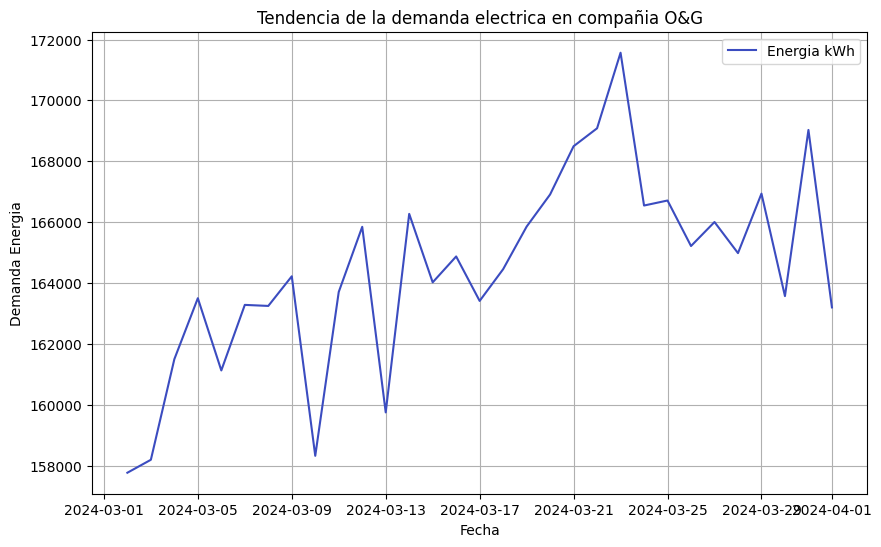

In [40]:
df_31 = df_combined.tail(31)
# Establecer la columna 'Fecha' como el índice del DataFrame
df_31.set_index('Date', inplace=True)

# Crear la gráfica de la serie de tiempo
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(df_31.index, df_31['Energia_kWhd'], label='Energia kWh')

# Etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Demanda Energia')
plt.title('Tendencia de la demanda electrica en compañia O&G')

# Mostrar la leyenda y la gráfica
plt.legend()
plt.grid(True)
plt.show()

### Modelo de tendencia lineal

In [ ]:
pip install -U sklearn-learn

In [42]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [43]:
trend_model = LinearRegression(fit_intercept=True)
trend_model.fit(np.arange(df_combined.shape[0]).reshape((-1,1)), df_combined['Energia_kWhd'])

LinearRegression()

In [44]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

Trend model coefficient=39.76209226770735 and intercept=118708.12721936071


In [45]:
residuals = np.array(df_combined['Energia_kWhd']) - trend_model.predict(np.arange(df_combined.shape[0]).reshape((-1,1)))

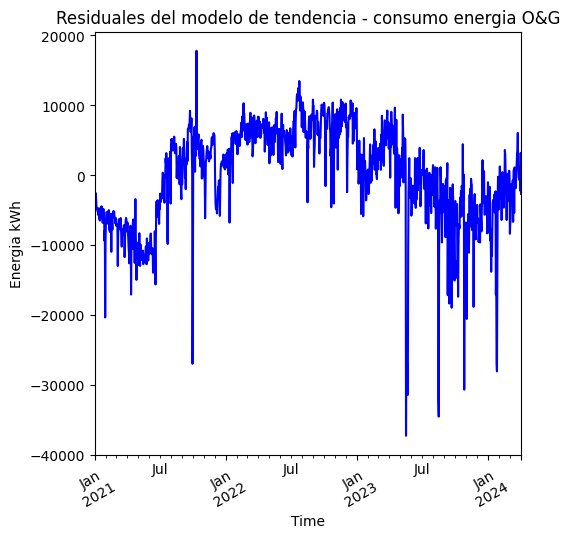

In [47]:
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=df_combined['Date']).plot(color='b')
plt.title('Residuales del modelo de tendencia - consumo energia O&G')
plt.xlabel('Time')
plt.ylabel('Energia kWh')
plt.xticks(rotation=30);

Se presenta una grafica de residuales del modelo lineal de tendencia general: Los residuales muestran mucha variabilidad, con fluctuaciones significativas a lo largo del tiempo.

**Tendencias observadas**:
- Los residuales muestran mucha variabilidad, con fluctuaciones significativas a lo largo del tiempo.
- Se observa que alrededor de mediados de 2021 y hasta mediados de 2022, los residuales tienden a estar en la parte superior del eje y (valores positivos), lo que sugiere que el modelo tiende a subestimar el consumo de energía en este período.
- Desde mediados de 2022 en adelante, los residuales parecen variar con amplitudes altas en ambos sentidos (tanto positivos como negativos), lo que indica que el modelo tiene problemas tanto para sobreestimar como subestimar los valores, con grandes variaciones en los errores de predicción.
- Hay algunos picos negativos notables (alrededor de enero de 2022, julio de 2023 y enero de 2024), lo que sugiere que en estos puntos específicos, el modelo sobreestimó considerablemente el consumo de energía.
- Los picos positivos, aunque menos extremos, también aparecen en momentos como finales de 2021, donde el modelo claramente subestima los valores.

No es explicita la estacionalidad pero es claro que existe una tendencia temporal que un modelo de tendencia lineal no es capaz de capturar

- El modelo de tendencia aplicado tiene errores significativos en varios puntos, lo que indica que el patrón de consumo de energía en este contexto es altamente complejo y no es capturado perfectamente por la tendencia general utilizada en el modelo.
- Es probable que un modelo de regresión simple no sea suficiente para capturar todas las variaciones en el consumo de energía, por lo que podrían considerarse otras estrategias, como agregar términos estacionales, modelado no lineal, o usar modelos más avanzados como ARIMA, redes neuronales u otros enfoques de series temporales.


### Analisis de autocorrelacion

In [48]:
lag = range(0,31)
acf = []
for l in lag:
    acf.append(df_combined['Energia_kWhd'].autocorr(l))

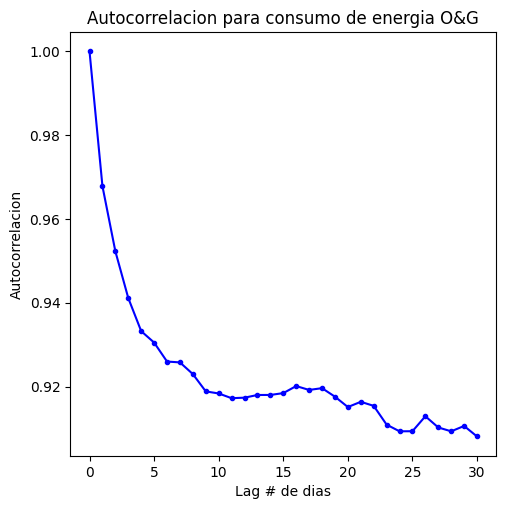

In [49]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(acf, marker='.', color='b')
plt.title('Autocorrelacion para consumo de energia O&G')
plt.xlabel('Lag # de dias')
plt.ylabel('Autocorrelacion');

1. **Patrón observado**:
- Decaimiento rápido: La autocorrelación empieza en 1.0 (lag 0), lo cual es esperado, ya que cualquier serie de tiempo está perfectamente correlacionada consigo misma en el lag 0.
- Sin embargo, la autocorrelación disminuye rápidamente conforme aumentan los días de retraso, aunque sigue siendo bastante alta hasta el lag de 30 días. Esto sugiere que los valores de consumo de energía están fuertemente correlacionados a lo largo del tiempo, pero esta correlación se debilita conforme el retraso entre las observaciones es mayor.
2. **Autocorrelación fuerte a corto plazo**:
- Los primeros 5 lags (días) muestran una autocorrelación muy alta, lo que sugiere que el consumo de energía en un día está altamente relacionado con el consumo de energía de los días inmediatamente anteriores.Esto indica que existe una fuerte dependencia temporal en los datos a corto plazo.
3. **Decaimiento gradual**:
- Después del lag 5, la autocorrelación continúa disminuyendo gradualmente, pero se mantiene en niveles altos (alrededor de 0.92). Esto puede indicar que, aunque el consumo de energía sigue correlacionado con días pasados, la fuerza de la correlación disminuye con el tiempo.
- Este tipo de comportamiento es típico en series temporales con tendencia, donde los valores tienden a estar correlacionados con sus valores pasados, pero la influencia de esos valores disminuye con el tiempo.

In [ ]:
pip install statsmodels

In [53]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 550x550 with 0 Axes>

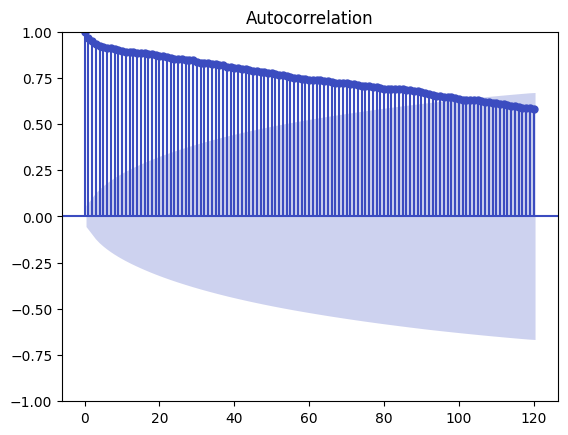

In [59]:
plt.figure(figsize=(5.5, 5.5));
plot_acf(df_combined['Energia_kWhd'], lags=120);

1. **Comportamiento general de la autocorrelación**:
- Autocorrelación alta en los primeros lags: El valor de la autocorrelación empieza cerca de 1.0 en el lag 0, como es esperado, ya que cualquier serie de tiempo está perfectamente correlacionada consigo misma en ese punto.
- La autocorrelación disminuye gradualmente conforme aumenta el número de lags, pero el decaimiento es lento. Aún en lag 100, la autocorrelación es alta, lo cual indica que hay dependencia a largo plazo en los datos.
- Esto sugiere que la serie temporal tiene una fuerte tendencia o persistencia, es decir, los valores futuros dependen significativamente de los valores pasados.
2. **Decaimiento lento y persistente**:
- El hecho de que la autocorrelación no decaiga rápidamente a cero indica la presencia de una tendencia clara en los datos. Esto puede sugerir que el proceso que genera esta serie temporal tiene memoria a largo plazo, donde los valores pasados siguen influyendo en los valores futuros incluso después de muchos retrasos (lags).
3. **Bandas de confianza**:
- Las bandas sombreadas representan el intervalo de confianza para la autocorrelación. Los valores de autocorrelación que caen fuera de estas bandas se consideran estadísticamente significativos.
En este caso, la mayoría de los valores de autocorrelación están muy por encima de las bandas de confianza, lo que indica que las correlaciones entre los valores retrasados son significativas. Esto refuerza la idea de que hay una fuerte dependencia temporal en la serie de tiempo.

<Figure size 550x550 with 0 Axes>

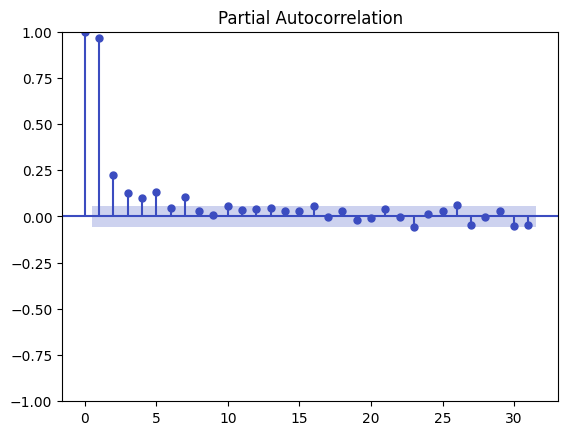

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(5.5, 5.5));
plot_pacf(df_combined['Energia_kWhd'], lags=31);

Se complementa el analisis con la autocorrelacion parcial que permite precisar el numero de lags para un modelo AR , eliminando la influencia de variables intermedias.

Se observa que los lags 1 , 2 y 3 son claramente significativos, el lag 4 esta por fuera de la banda de confianza muy cercano al limite y el 5 retoma el crecimiento, el 6 no es significativo y 7 lo es ligeramente, esto sugiere algunos comportamientos no lineales , efectos retardados o multicolinealidad.

en función de la gráfica se sugeriría iniciar con un AR (5).

### Estadisticos Moviles

In [65]:
weekly_moving_average= df_combined['Energia_kWhd'].rolling(7).mean()
monthly_moving_average = df_combined['Energia_kWhd'].rolling(30).mean()

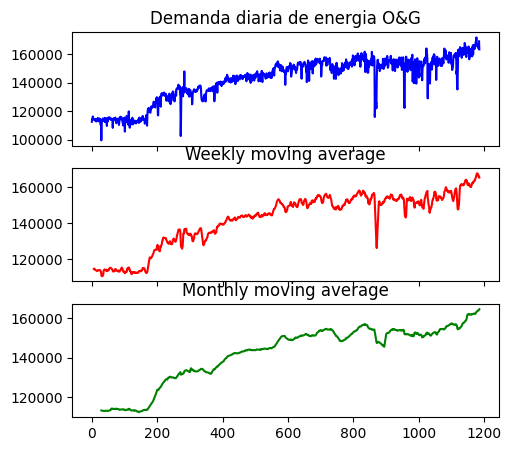

In [66]:
fig, axarr = plt.subplots(3, sharex=True)
fig.set_size_inches(5.5, 5,5)

df_combined['Energia_kWhd'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Demanda diaria de energia O&G');

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly moving average');

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average');

- Variabilidad: La demanda diaria de energía (primera gráfica) muestra una alta volatilidad, con fluctuaciones que son comunes en los datos diarios. Sin embargo, al aplicar promedios móviles, puedes suavizar estas fluctuaciones para observar patrones más claros.
- Tendencia: A medida que se aumenta el tamaño de la ventana de promedio móvil (de semanal a mensual), se vuelve más fácil identificar la tendencia general creciente en la demanda de energía. Las gráficas semanales y mensuales revelan que, aunque hay eventos de corta duración que afectan la demanda, la tendencia general sigue siendo positiva a largo plazo.
- Suavización: El promedio móvil mensual (gráfica inferior) es el que ofrece una visión más estable y clara de la evolución de la demanda de energía, eliminando la mayor parte de las fluctuaciones de corto plazo

### Eliminación de tendencia

In [67]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [150]:
df_combined.index = df_combined['Date']
df_combined.drop('Date', axis=1, inplace=True)
df_combined.head()

,Energia_kWhd
Date,
2021-01-01,112518.8571
2021-01-02,114637.7143
2021-01-03,114720.0000
2021-01-04,116262.8571
2021-01-05,115220.5714


In [103]:
first_order_diff = df_combined['Energia_kWhd'].diff(1)


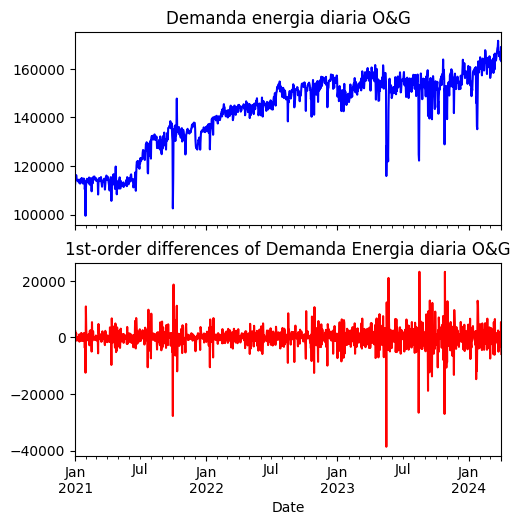

In [104]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
df_combined['Energia_kWhd'].plot(ax=ax[0], color='b');
ax[0].set_title('Demanda energia diaria O&G');
first_order_diff.plot(ax=ax[1], color='r');
ax[1].set_title('1st-order differences of Demanda Energia diaria O&G');

Es visible la eliminación de la tendencia, los datos estan en al rededor de 0 y no se observan patrones a simple vista

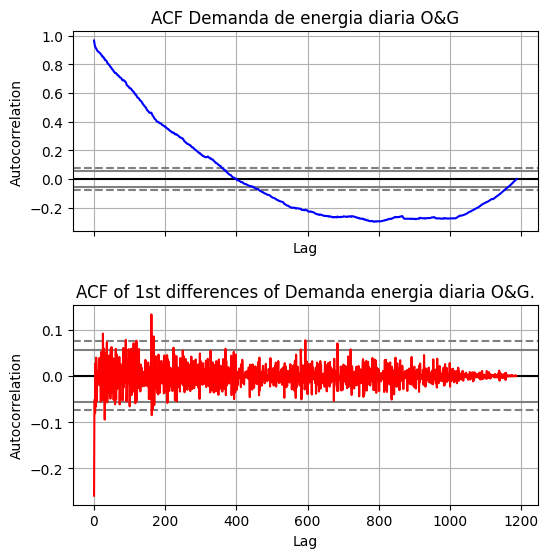

In [105]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(df_combined['Energia_kWhd'], color='b', ax=ax[0])
ax[0].set_title('ACF Demanda de energia diaria O&G')
autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of 1st differences of Demanda energia diaria O&G.')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

In [106]:
acf, confint, qstat, pvalues = stattools.acf(df_combined['Energia_kWhd'],
                                                                 nlags=30,
                                                                 qstat=True,
                                                                 alpha=0.05)

In [107]:
alpha = 0.05
for l, p_val in enumerate(pvalues):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 2.953779262949521e-243
Null hypothesis is rejected at lag = 1 for p-val = 0.0
Null hypothesis is rejected at lag = 2 for p-val = 0.0
Null hypothesis is rejected at lag = 3 for p-val = 0.0
Null hypothesis is rejected at lag = 4 for p-val = 0.0
Null hypothesis is rejected at lag = 5 for p-val = 0.0
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is rejected at lag = 16 for p-val = 0.0
Null hypothesis is rejected at lag = 17

In [118]:
acf_first_diff, confint_first_diff,\
qstat_first_diff, pvalues_first_diff = stattools.acf(first_order_diff.iloc[1:],
                                                     nlags=20,
                                                     qstat=True,
                                                     alpha=0.05)

In [119]:
alpha = 0.05
for l, p_val in enumerate(pvalues_first_diff):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 4.046671992968014e-19
Null hypothesis is rejected at lag = 1 for p-val = 2.5575458899081e-19
Null hypothesis is rejected at lag = 2 for p-val = 4.229337895210754e-19
Null hypothesis is rejected at lag = 3 for p-val = 5.667889969245993e-20
Null hypothesis is rejected at lag = 4 for p-val = 1.9398525388946963e-19
Null hypothesis is rejected at lag = 5 for p-val = 7.089160797765634e-20
Null hypothesis is rejected at lag = 6 for p-val = 1.2648453993700837e-19
Null hypothesis is rejected at lag = 7 for p-val = 4.064629571929796e-19
Null hypothesis is rejected at lag = 8 for p-val = 2.902349299150265e-19
Null hypothesis is rejected at lag = 9 for p-val = 1.0022751895109622e-18
Null hypothesis is rejected at lag = 10 for p-val = 2.8035950740135286e-18
Null hypothesis is rejected at lag = 11 for p-val = 8.788217482063054e-18
Null hypothesis is rejected at lag = 12 for p-val = 2.5986028841902383e-17
Null hypothesis is rejected at lag = 13 for p

Aun se rechaza la hipotesis en la diferenciación de primer orden, pero en la de segundo orden el valor es 0 y no se puede calcular, se revisará esto con mayor detalle en la estructuración de los modelos.

### Prueba de estacionariedad

In [120]:
adf_result = stattools.adfuller(df_combined['Energia_kWhd'], autolag='AIC')

In [122]:
print('p-val of the ADF test in energy demand:', adf_result[1])

p-val of the ADF test in energy demand: 0.6669613546396562


Era claro en las graficas que la energía tiene una tendencia al crecimiento y por lo tanto no es estacionaria, esto se comprueba la prueba de Dickey-Fuller , donde no es posible rechazar la hipotesis de una raiz unitaria en la serie

### Descomposicion de la serie temporal

In [152]:

# Resamplear los datos para calcular el promedio mensual
df_monthly_avg = df_combined.resample('M').mean()

# Mostrar el DataFrame con los datos promedios mensuales
df_monthly_avg.head()


,Energia_kWhd
Date,
2021-01-31,113220.718896
2021-02-28,114218.938779
2021-03-31,113802.027645
2021-04-30,113479.314283
2021-05-31,112847.336406


In [164]:
MA12 = df_monthly_avg['Energia_kWhd'].rolling(window=6).mean()
trendComp = MA12.rolling(window=2).mean()

In [165]:


# Luego, extraer el mes
df_monthly_avg['mes'] = df_monthly_avg.index.month.astype(str).str.zfill(2)

len(df_monthly_avg)

40

In [182]:

# Cálculo de residuales
residuals = df_monthly_avg['Energia_kWhd'] - trendComp

# Asegurarse de que el mes sea un valor manejable (si son enteros)
month = df_monthly_avg['mes']

# Calcular el promedio de los residuales por cada mes
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])

# Número de observaciones deseado
num_observations = 40

# Repetir la componente estacional
seasonalComp = np.tile(monthwise_avg.values.flatten(), (num_observations // 12) + 1)[:num_observations]

# Mostrar la longitud para comprobar que tiene exactamente 1187 datos
print(len(seasonalComp))



40


In [183]:
irr_var = df_monthly_avg['Energia_kWhd'] - trendComp - seasonalComp

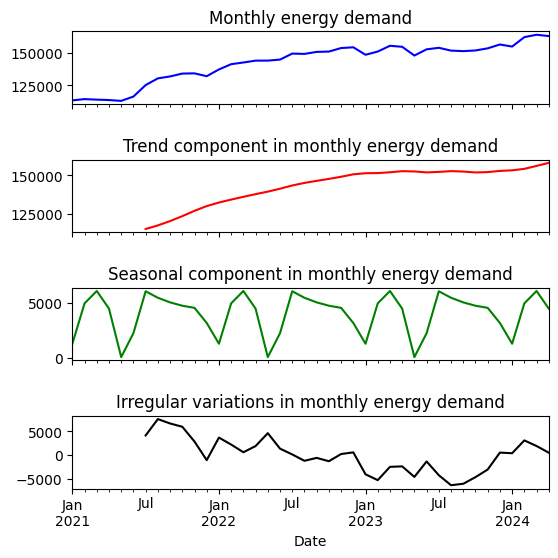

In [184]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

df_monthly_avg['Energia_kWhd'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly energy demand')

pd.Series(data=trendComp, index=df_monthly_avg.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly energy demand')

pd.Series(data=seasonalComp, index=df_monthly_avg.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly energy demand')

pd.Series(data=irr_var, index=df_monthly_avg.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly energy demand')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

In [170]:
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')
print('p-val of the ADF test on irregular variations in energy demand:', adf_result[1])

p-val of the ADF test on irregular variations in energy demand: 0.2449722105237454


Se observa que es posible extraer la tendencia general de la serie y se representa un patron de estacionalidad, pero en los errores irreducibles aun no es posible concluir no estacionariedad por lo que se probará un modelo multiplicativo

In [171]:
residuals = df_monthly_avg['Energia_kWhd'] / trendComp

In [172]:

# Asegurarse de que el mes sea un valor manejable (si son enteros)
month = df_monthly_avg['mes']

# Calcular el promedio de los residuales por cada mes
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])

# Número de observaciones deseado
num_observations = 40

# Repetir la componente estacional
seasonalComp = np.tile(monthwise_avg.values.flatten(), (num_observations // 12) + 1)[:num_observations]

# Mostrar la longitud para comprobar 
print(len(seasonalComp))

40


In [173]:
irr_var = df_monthly_avg['Energia_kWhd'] / (trendComp * seasonalComp)

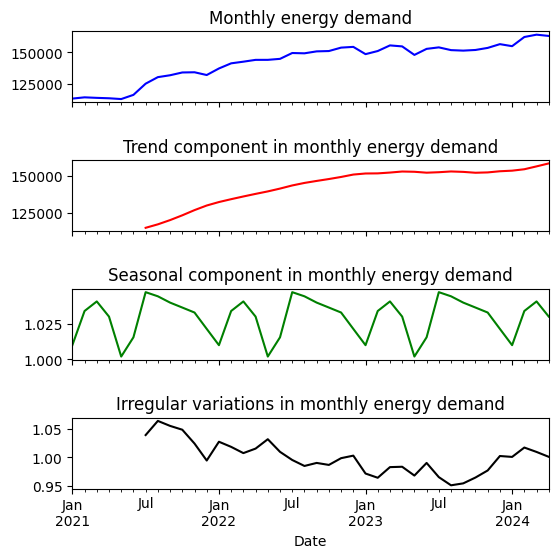

In [178]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

df_monthly_avg['Energia_kWhd'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly energy demand')

pd.Series(data=trendComp, index=df_monthly_avg.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly energy demand')

pd.Series(data=seasonalComp, index=df_monthly_avg.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly energy demand')

pd.Series(data=irr_var, index=df_monthly_avg.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly energy demand')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

In [175]:
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')
print('p-val of the ADF test on irregular variations in energy demand:', adf_result[1])

p-val of the ADF test on irregular variations in energy demand: 0.2673509566091927


En este caso la descomposicion multiplicativa tampoco fue suficiente lo que sugiere que aún existen patrones por capturar, esto será relevante a la hora de escoger modelos que sean lo suficientemente robustos para capturar la estructura subyacente de la serie de tiempo.

In [177]:
diff_residuals = residuals.diff(1).dropna()
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(diff_residuals,autolag='AIC')
print(adf_result[1])  # p-value


1.6534718972913168e-07


Diferenciando los residuales en primer orden se obtiene un p-valor menor a 0,05 indicando estacionariedad, lo que reafirma que la descomposición no fue suficiente para capturar la estructura real de la serie, esto indica que el modelo que representa la serie de tiempo debe ser más robusto.

Estas tendencias en los errores indican que se necesitan modelos complejos , ARIMA, SARIMA, GARCH o modelos de machine learning